In [1]:
#Necessary Imports

from IPython.display import display
from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch
import seaborn as sns
plt.style.use('bmh')


import warnings
warnings.filterwarnings("ignore")

#To make the dataframe to fully display and not wrap around
pd.set_option('display.expand_frame_repr', False)

# Data Loading

In [2]:
df_9= pd.read_excel("DDS9_Data_Extract_with_labels.xlsx")
df_10=pd.read_excel("DDS10_Data_Extract_with_labels.xlsx")
df_11=pd.read_excel("DDS11_Data_Extract_with_labels.xlsx")

#deleting the unrelated columns - Record Number
df_9.drop(df_9.columns[0],axis=1,inplace=True)
df_10.drop(df_10.columns[0],axis=1,inplace=True)
df_11.drop(df_11.columns[0],axis=1,inplace=True)

#printing shapes for all dataframes
r1,c1=df_9.shape
r2,c2=df_10.shape
r3,c3=df_11.shape
print("there are ",r1,'rows and ',c1,' columns in 2009 dataset')
print("there are ",r2,'rows and ',c2,' columns in 2010 dataset')
print("there are ",r3,'rows and ',c3,' columns in 2011 dataset')

there are  2076 rows and  190  columns in 2009 dataset
there are  2205 rows and  196  columns in 2010 dataset
there are  2131 rows and  197  columns in 2011 dataset


In [3]:

#since the column names are large, saving them in numpy arrays
column_names_9=df_9.columns.to_numpy()
column_names_10=df_10.columns.to_numpy()
column_names_11=df_11.columns.to_numpy()

labels=['Col'+str(x) for x in range(1,c1+1)]
df_9.columns=labels
labels=['Col'+str(x) for x in range(1,c2+1)]
df_10.columns=labels
labels=['Col'+str(x) for x in range(1,c3+1)]
df_11.columns=labels

# Data Pre-processing

In [4]:
#printing column names in dataframes having null values
print("Columns containing null values in 2009 dataset:")
print(df_9.columns[df_9.isna().any()])

print("Columns containing null values in 2010 dataset:")
print(df_10.columns[df_10.isna().any()])

print("Columns containing null values in 2011 dataset:")
print(df_11.columns[df_11.isna().any()])


Columns containing null values in 2009 dataset:
Index(['Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col63',
       'Col64', 'Col65', 'Col66', 'Col67', 'Col68', 'Col69', 'Col70', 'Col71',
       'Col72', 'Col73', 'Col74', 'Col75', 'Col76', 'Col77', 'Col78', 'Col79',
       'Col80', 'Col81', 'Col82', 'Col83', 'Col84', 'Col97', 'Col98', 'Col99',
       'Col100', 'Col101', 'Col102', 'Col103', 'Col104', 'Col105', 'Col106',
       'Col107', 'Col108', 'Col109', 'Col110', 'Col111', 'Col112', 'Col113',
       'Col114', 'Col115', 'Col116', 'Col117', 'Col118', 'Col119', 'Col120',
       'Col121', 'Col122', 'Col123', 'Col124', 'Col125', 'Col126', 'Col139',
       'Col140', 'Col141', 'Col142', 'Col143', 'Col144', 'Col145', 'Col146',
       'Col147', 'Col148', 'Col149', 'Col150', 'Col151', 'Col152', 'Col153',
       'Col154', 'Col155', 'Col156', 'Col157', 'Col158', 'Col159', 'Col173',
       'Col174', 'Col175', 'Col176', 'Col177', 'Col178', 'Col179', 'Col180',
       'Col181', 'Col

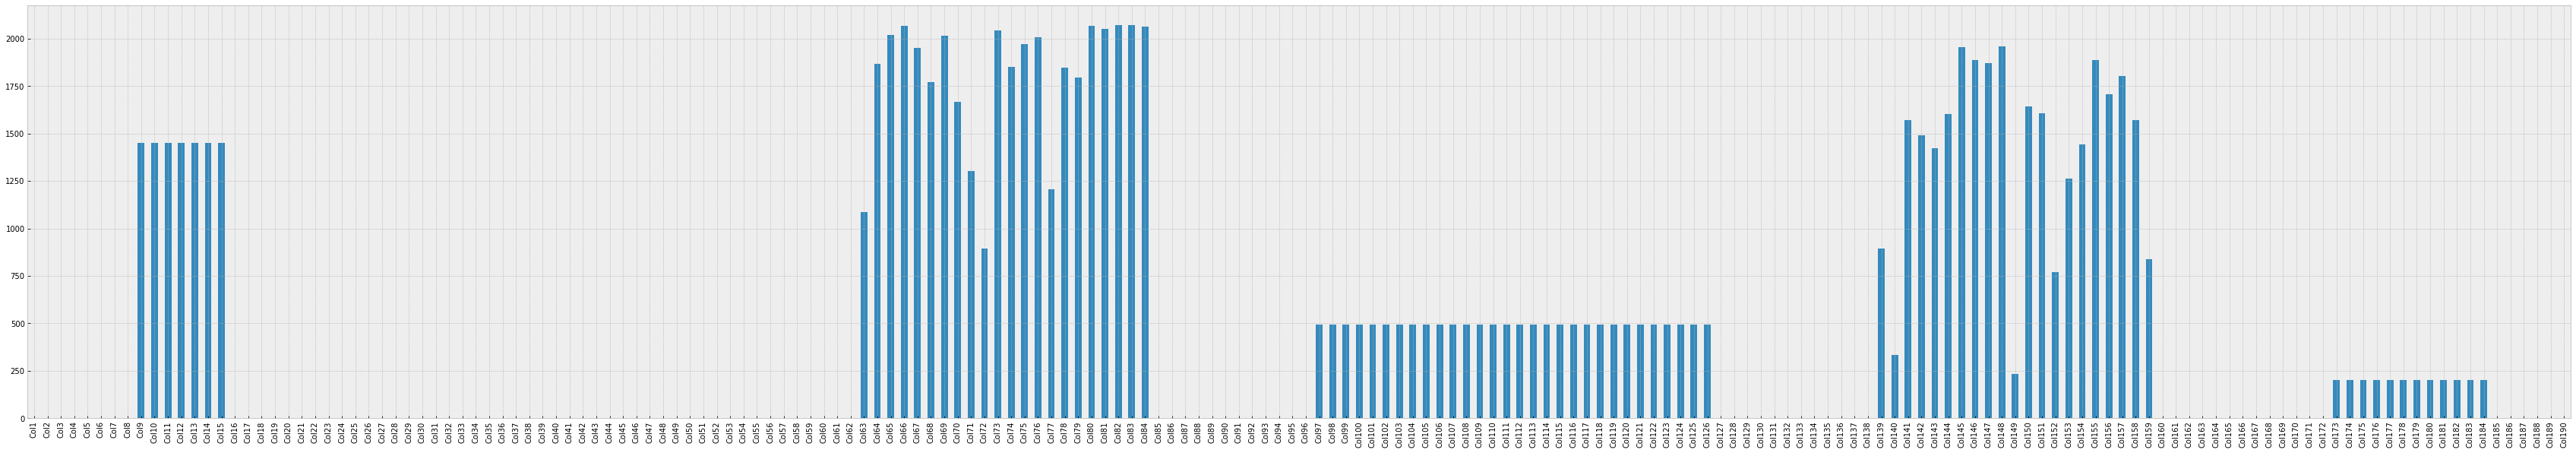

In [5]:
nulls = df_9.isnull().sum()#.sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(60, 10))


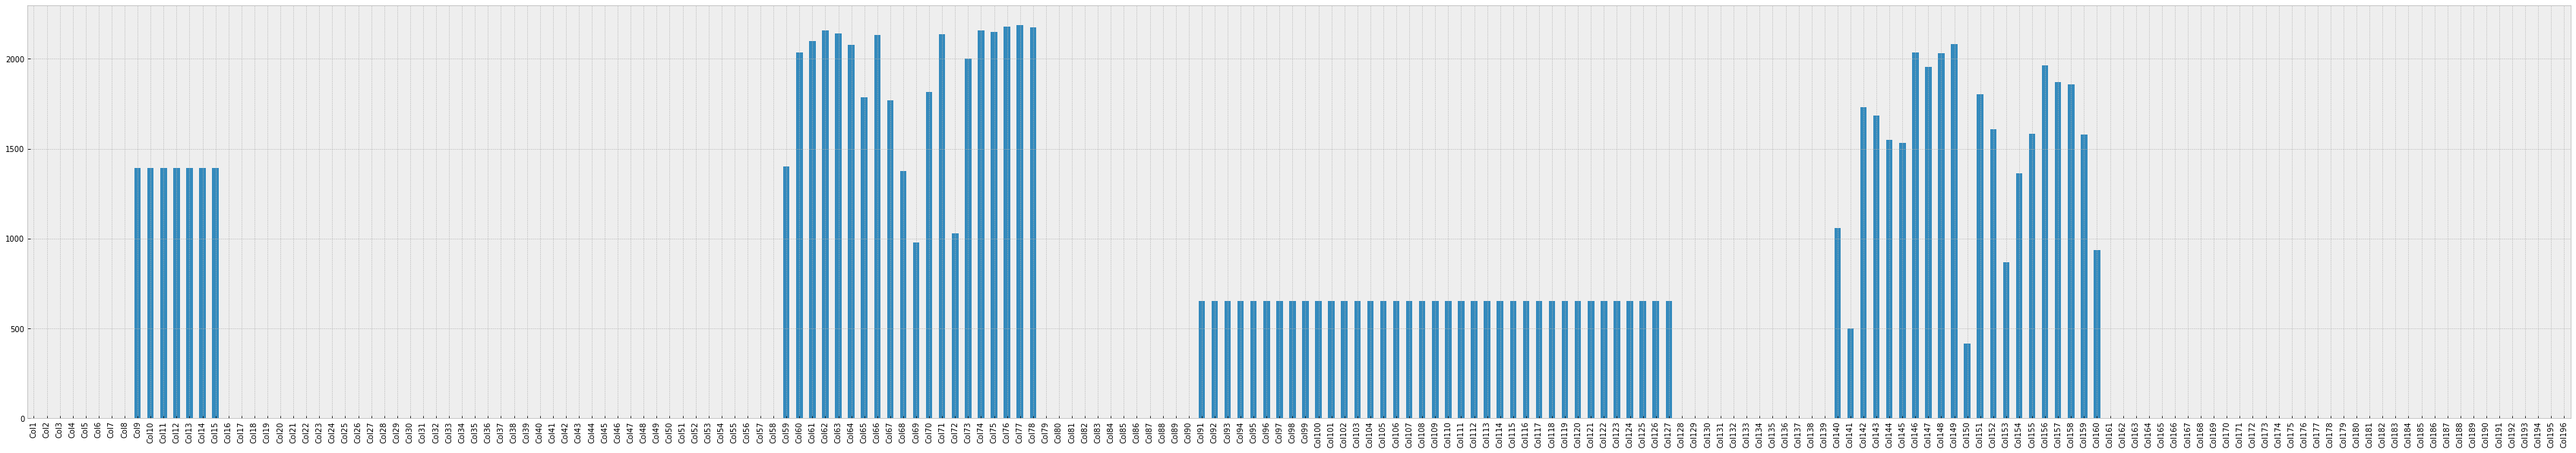

In [6]:

nulls = df_10.isnull().sum()#.sort_values(ascending=False)
nulls.plot(
    kind='bar', figsize=(60, 10))


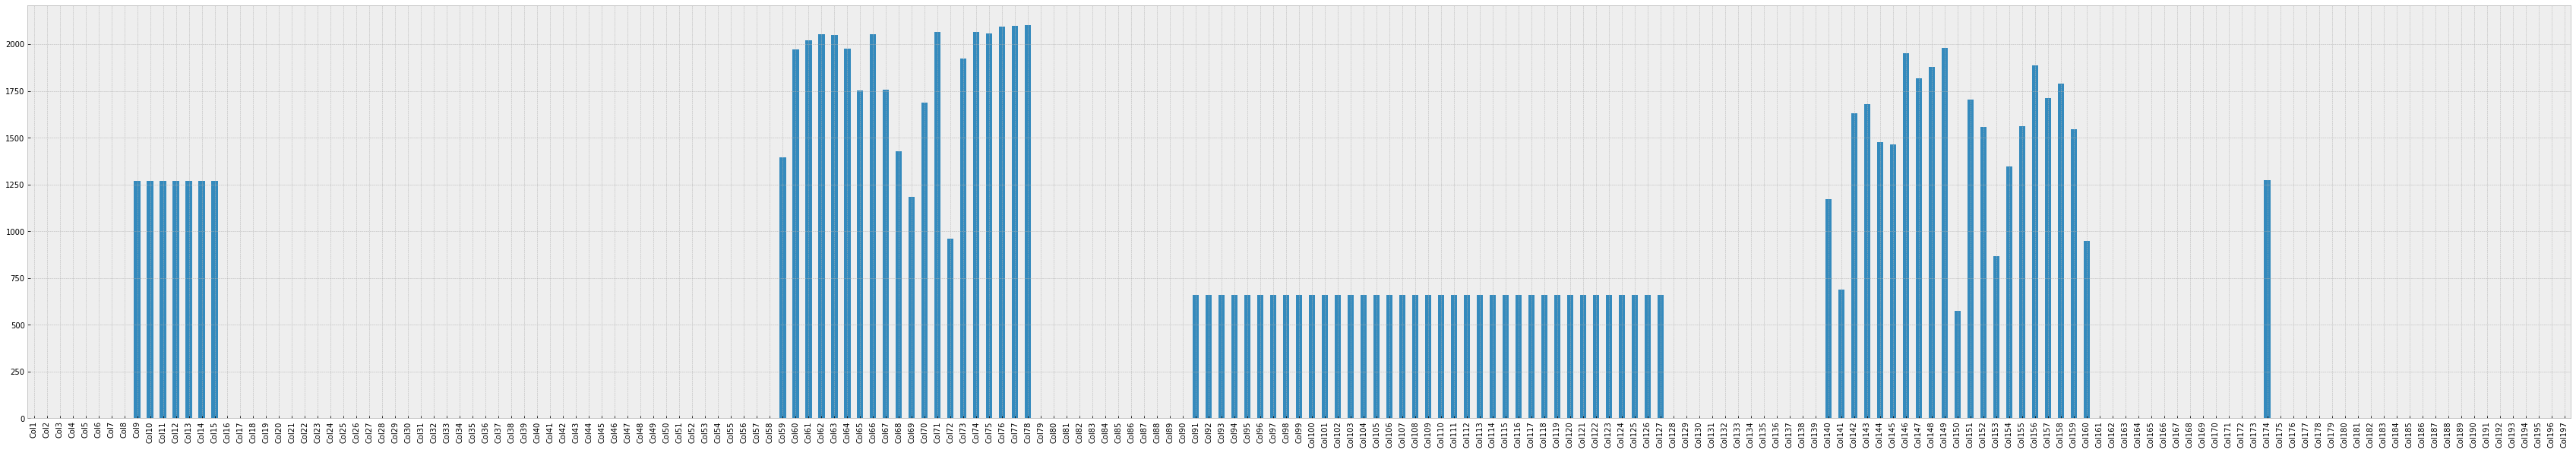

In [7]:
nulls = df_11.isnull().sum()#.sort_values(ascending=False)
nulls.plot(
    kind='bar', figsize=(60, 10))

As we can see from above graphs,the dataset has similar columns having null values across the years. The dataset shows high amount of similarity.

In [8]:
a=df_9.isnull().sum().to_frame()
b=df_10.isnull().sum().to_frame()
c=df_11.isnull().sum().to_frame()
a[a[0]>0]

#replacing NaN's with -9999
df_9.fillna(-9999,inplace=True)
df_10.fillna(-9999,inplace=True)
df_11.fillna(-9999,inplace=True)

In [9]:
print("Before processing:")
print(df_9.shape)
print(df_10.shape)
print(df_11.shape)
print('\n')

#dropping all rows where the Age is greater than 100
df_9.drop( df_9[df_9['Col1'] >= 100].index , inplace=True)
df_10.drop( df_10[df_10['Col1'] >= 100].index , inplace=True)
df_11.drop( df_11[df_11['Col1'] >= 100].index , inplace=True)


#dropping all rows where the Age is less than 10
df_9.drop( df_9[df_9['Col1'] <= 10].index , inplace=True)
df_10.drop( df_10[df_10['Col1'] <= 10].index , inplace=True)
df_11.drop( df_11[df_11['Col1'] <= 10].index , inplace=True)


#dropping all rows where the Income is unknown
df_9.drop( df_9[df_9['Col16'] == 'Do not know'].index , inplace=True)
df_10.drop( df_10[df_10['Col16'] == 'Do not know'].index , inplace=True)
df_11.drop( df_11[df_11['Col16'] == 'Do not know'].index , inplace=True)
print("After processing:")
print(df_9.shape)
print(df_10.shape)
print(df_11.shape)


Before processing:
(2076, 190)
(2205, 196)
(2131, 197)


After processing:
(1900, 190)
(2035, 196)
(2011, 197)


Distribution Graphs for 2009 dataset:



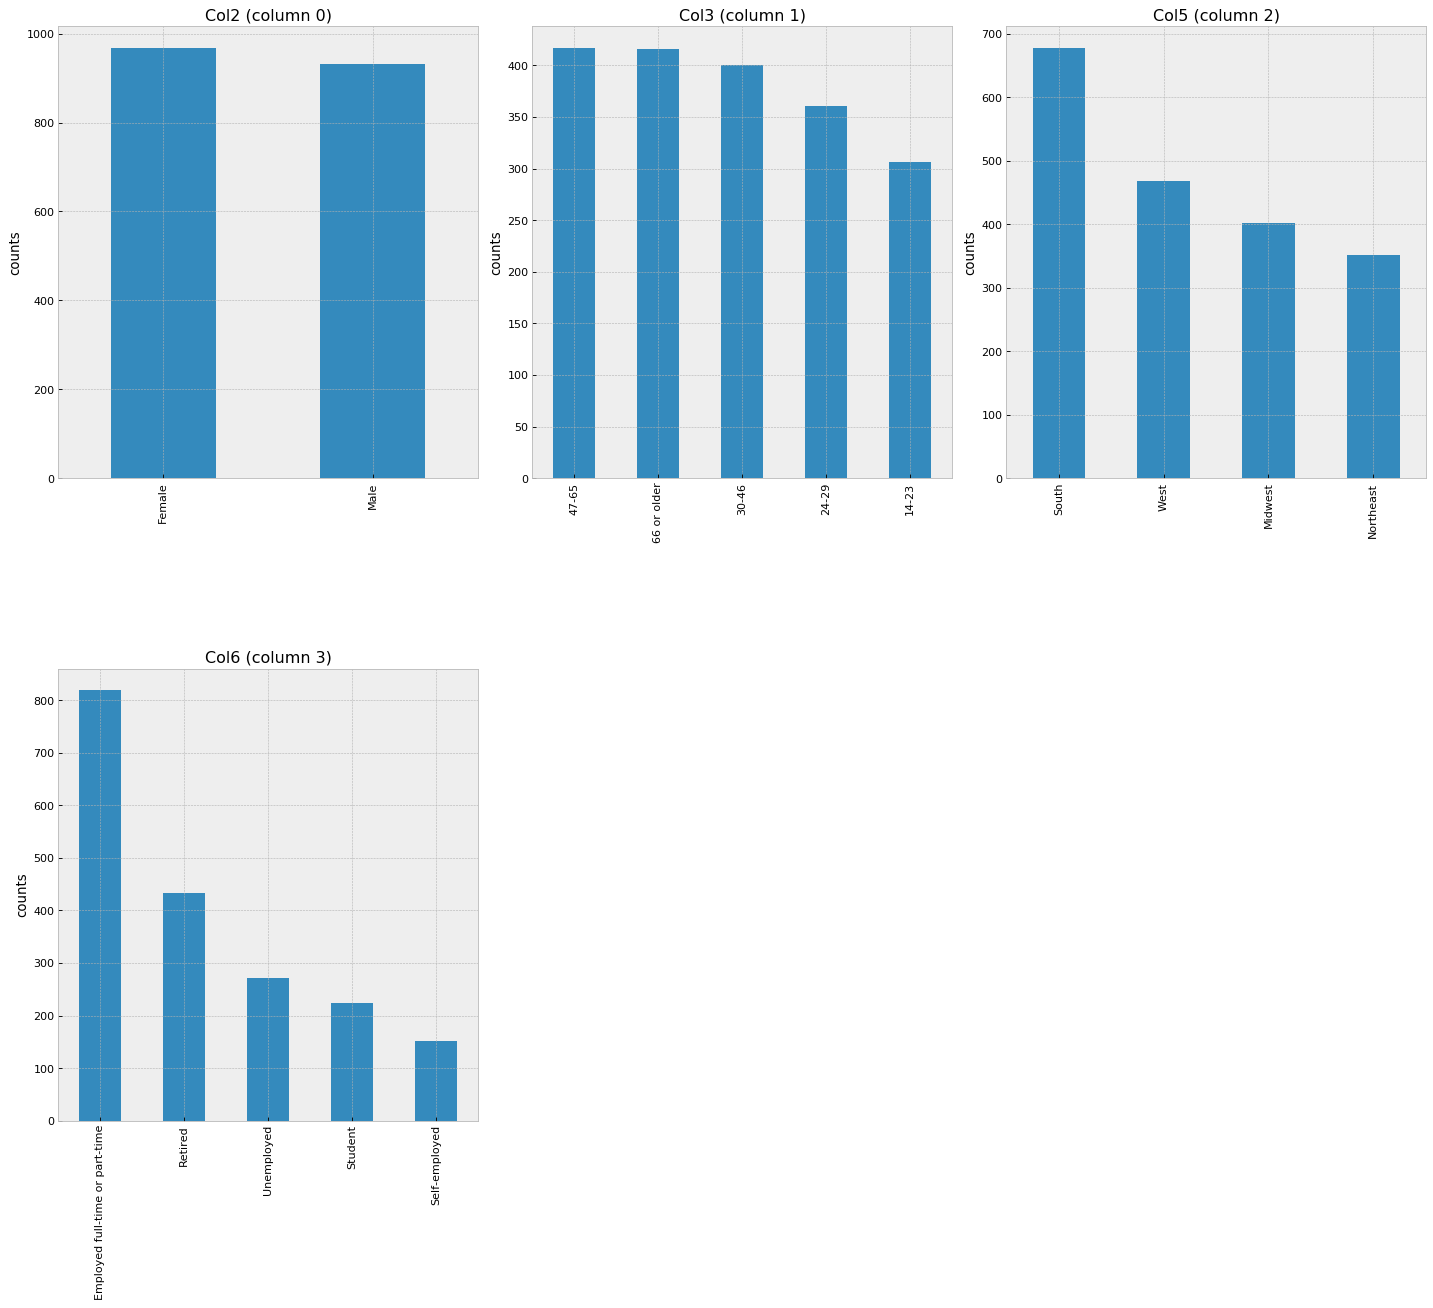


Distribution Graphs for 2010 dataset:



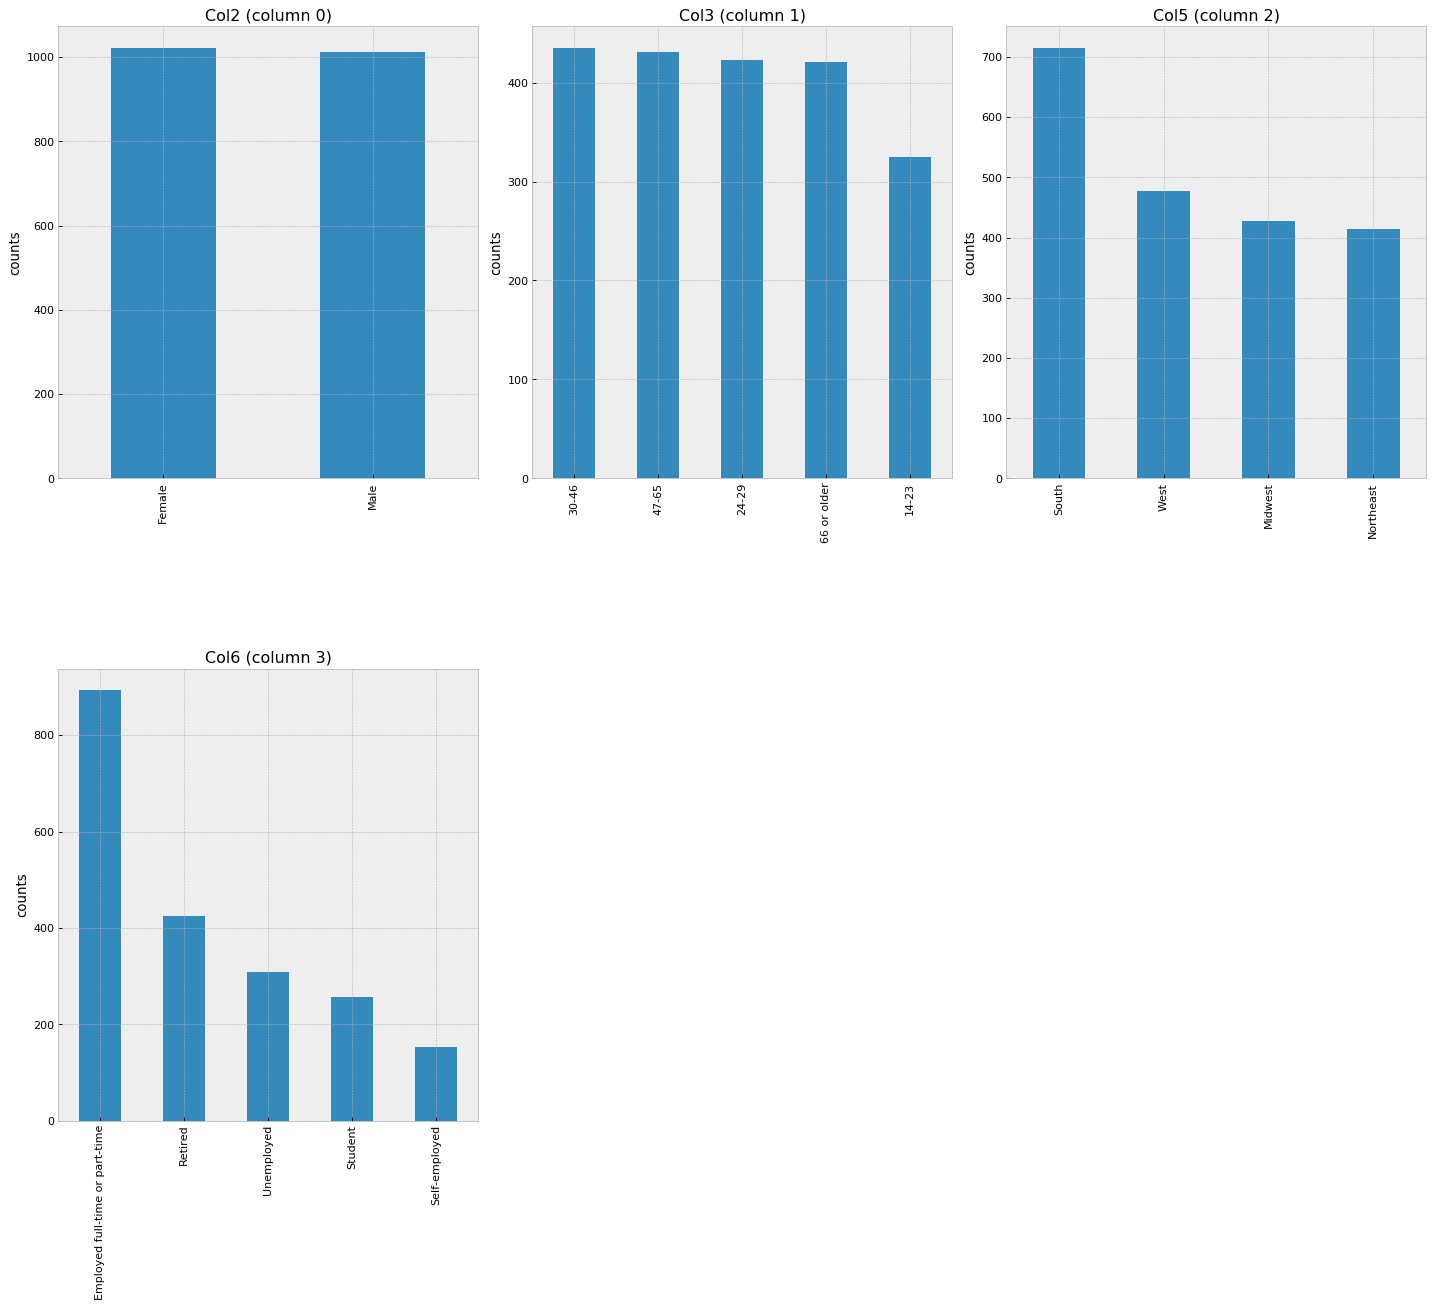


Distribution Graphs for 2011 dataset:



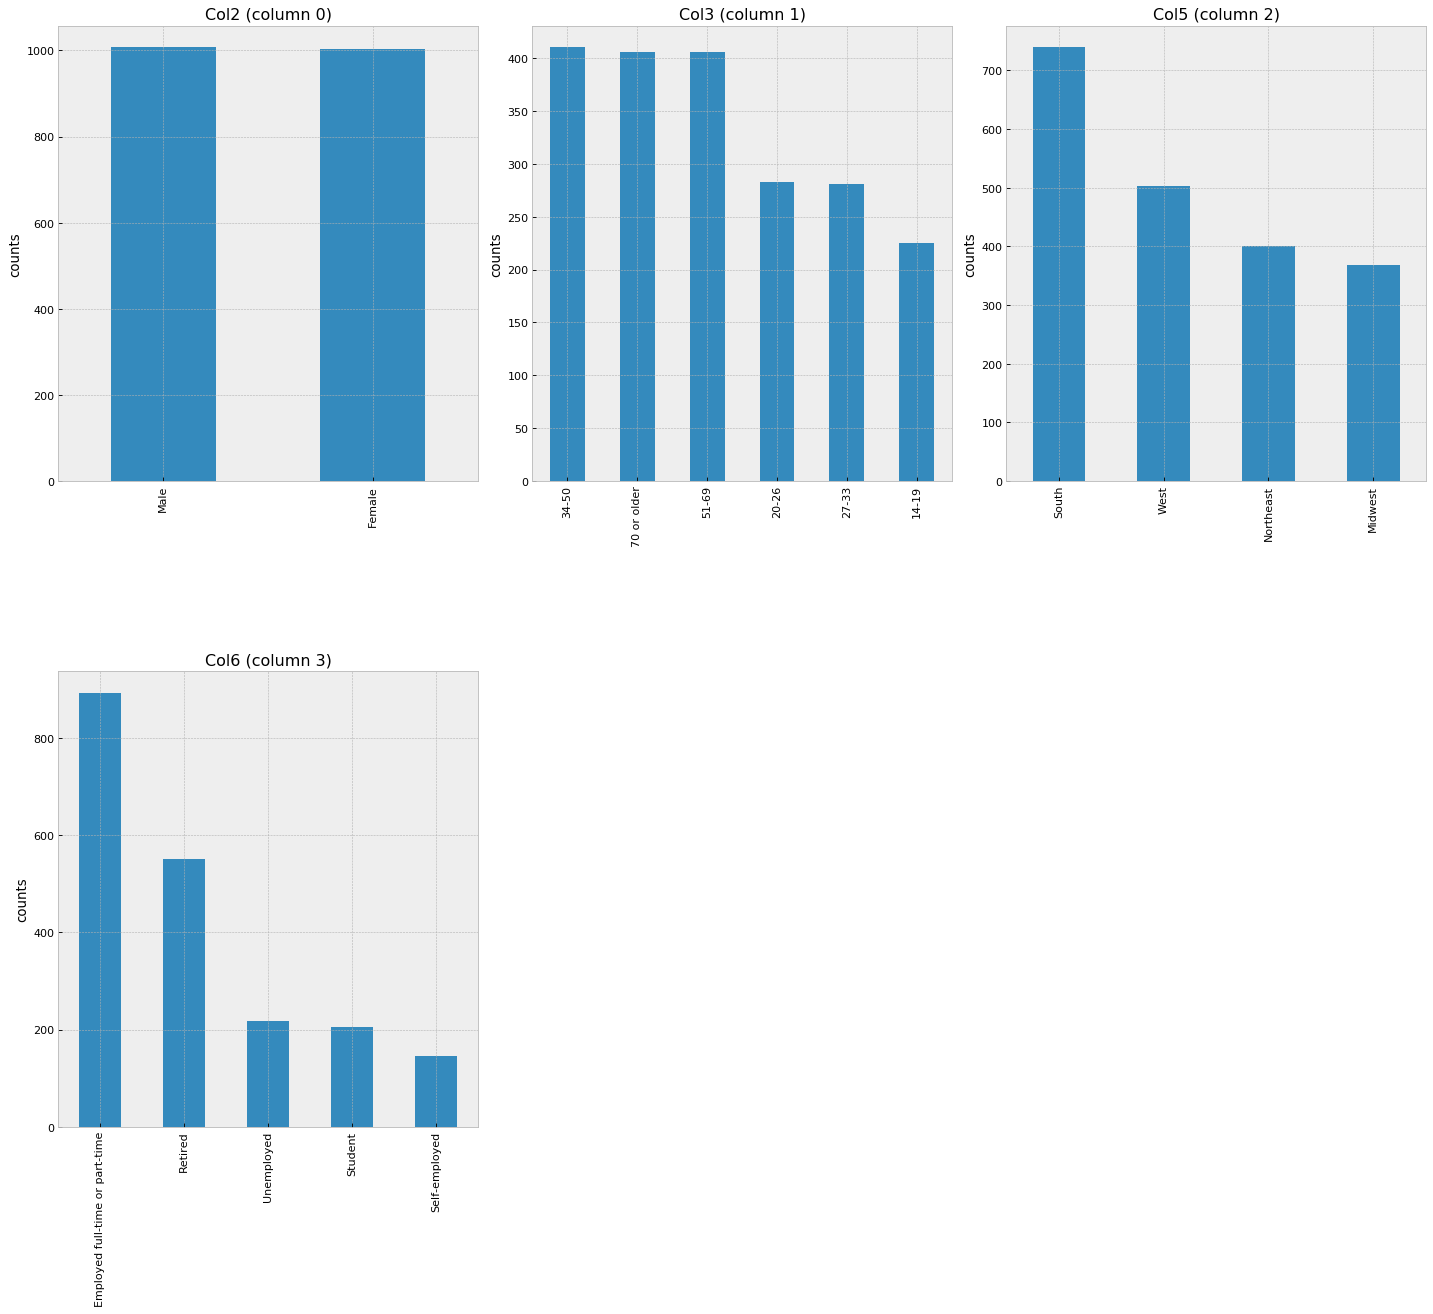

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


print("Distribution Graphs for 2009 dataset:\n")
plotPerColumnDistribution(df_9, 4, 3)
print("\nDistribution Graphs for 2010 dataset:\n")
plotPerColumnDistribution(df_10, 4, 3)
print("\nDistribution Graphs for 2011 dataset:\n")
plotPerColumnDistribution(df_11, 4, 3)

We could see that there is an equal distribution of male and female respondents.

Majority of repondents are having jobs or are retired.

The data is biased towards south and western states of USA geographically

Demographically, the distribution of respondents's age is normal and even across the years.

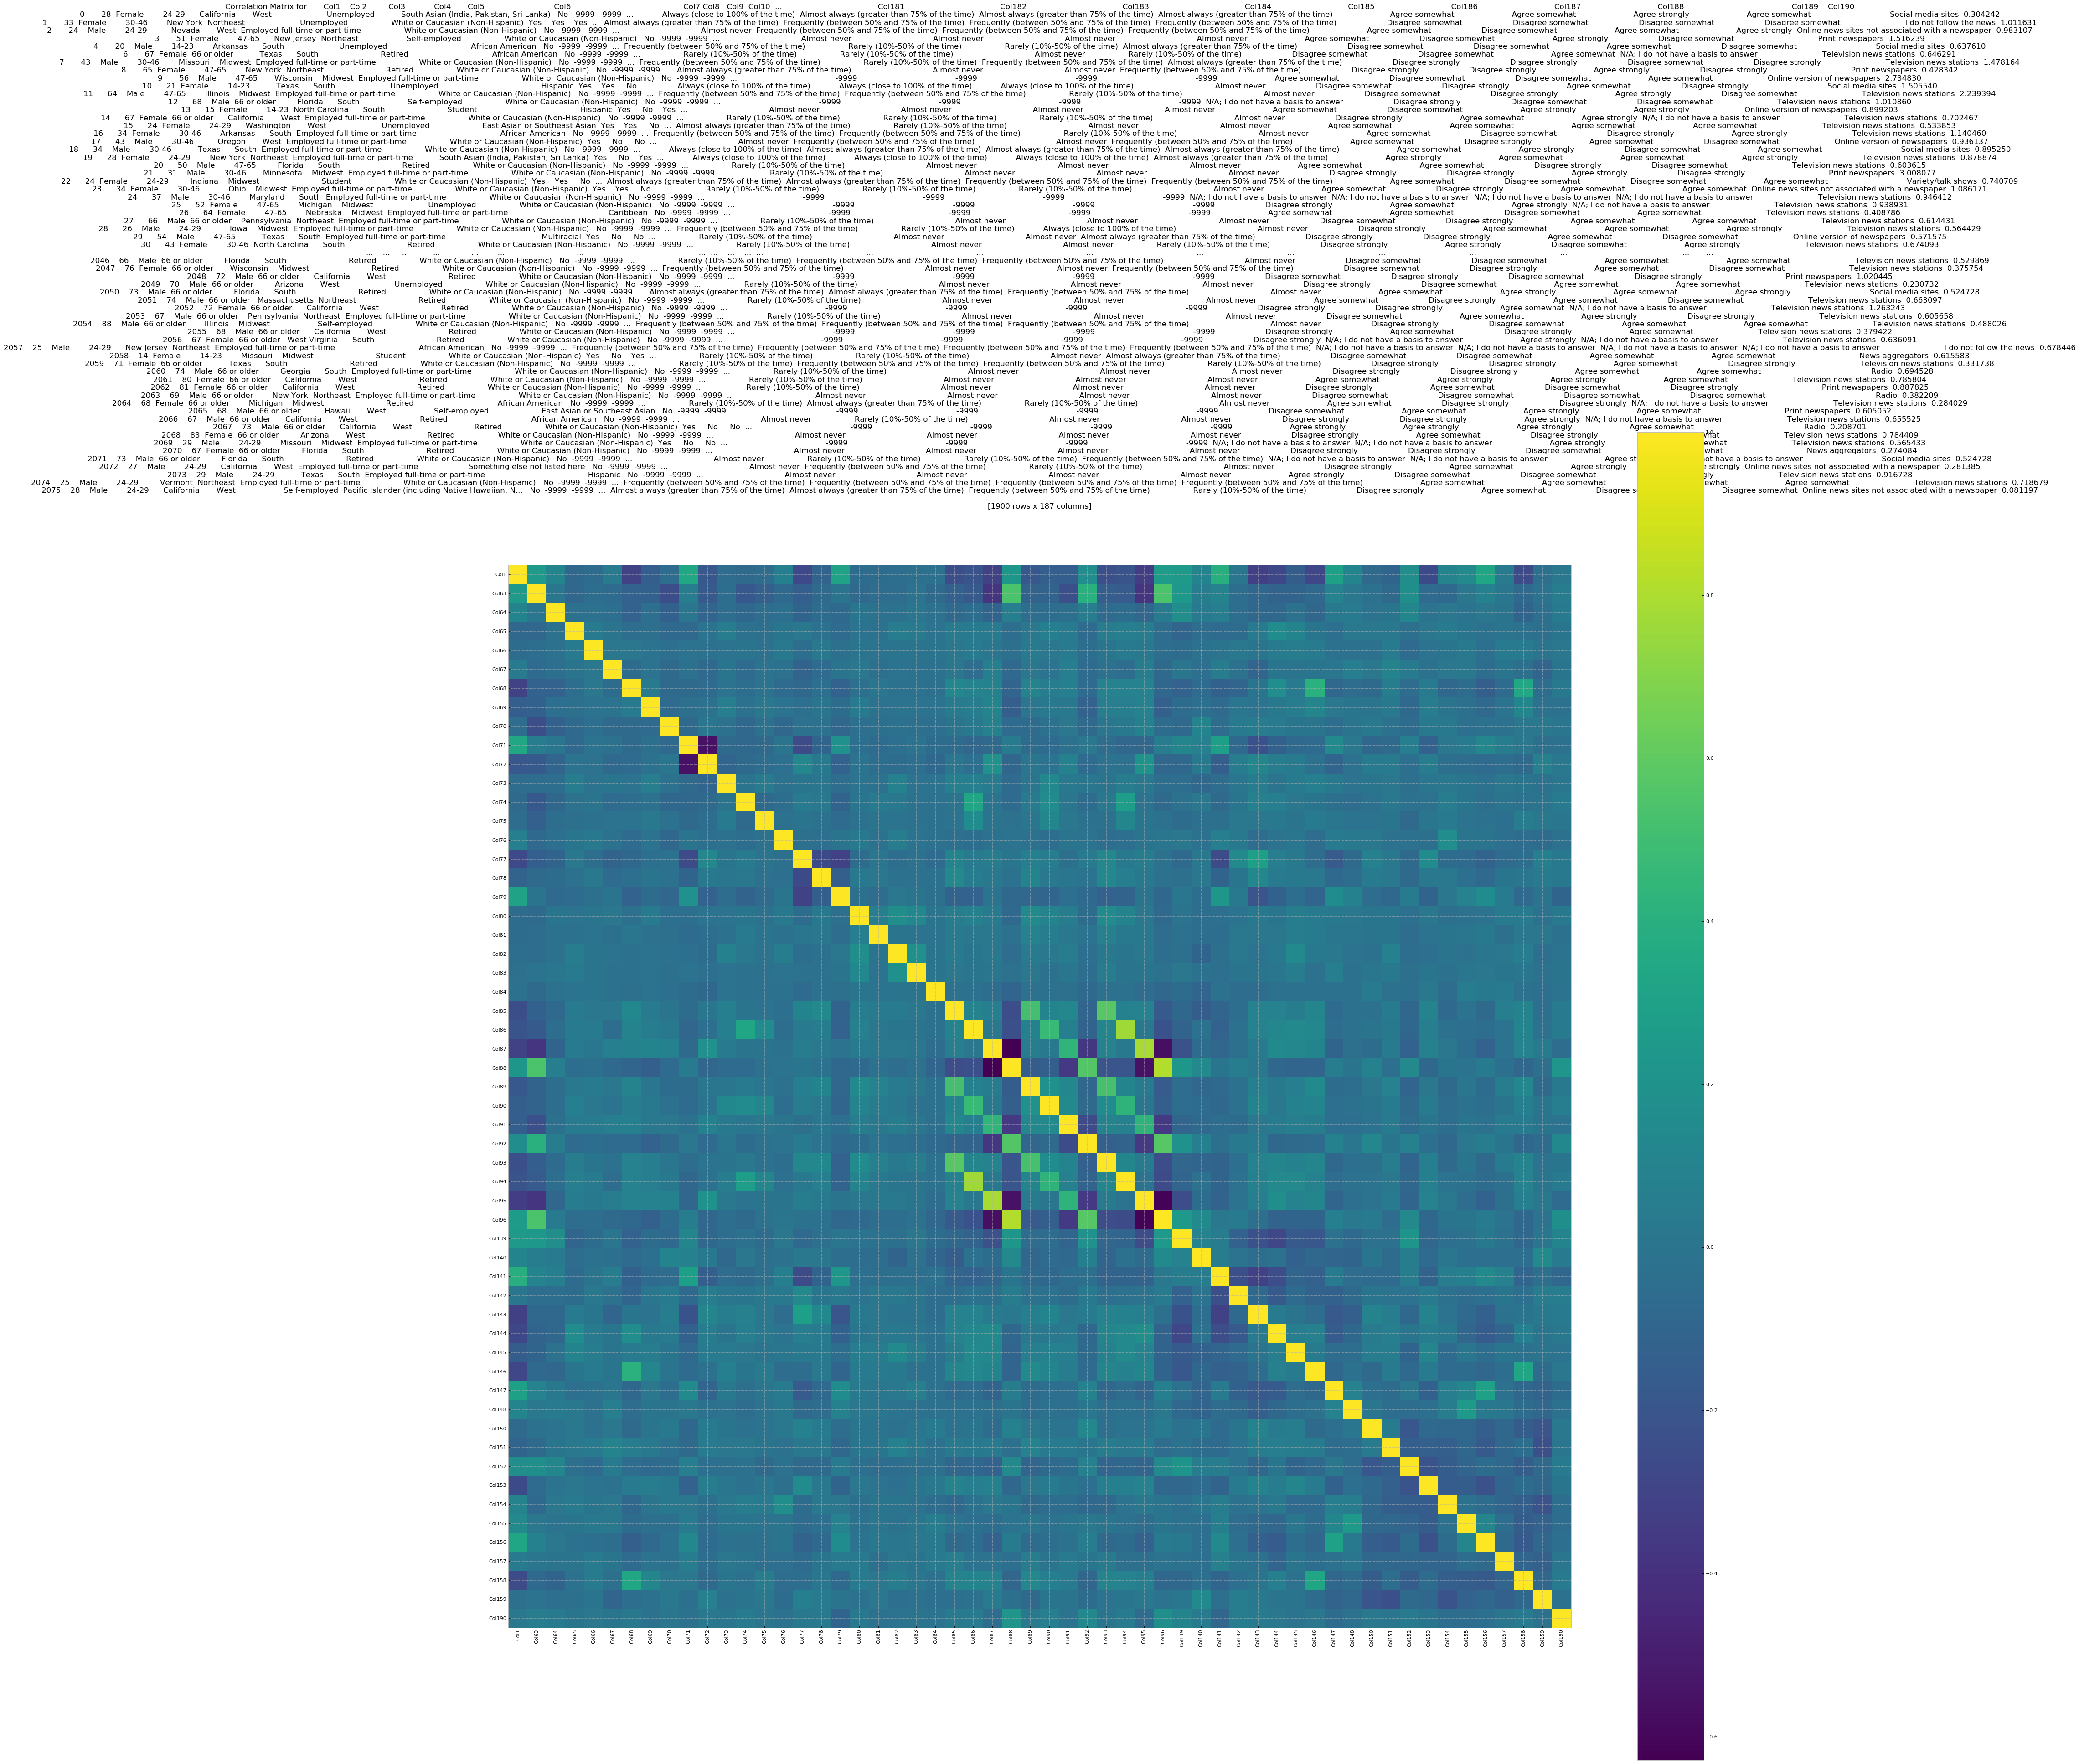

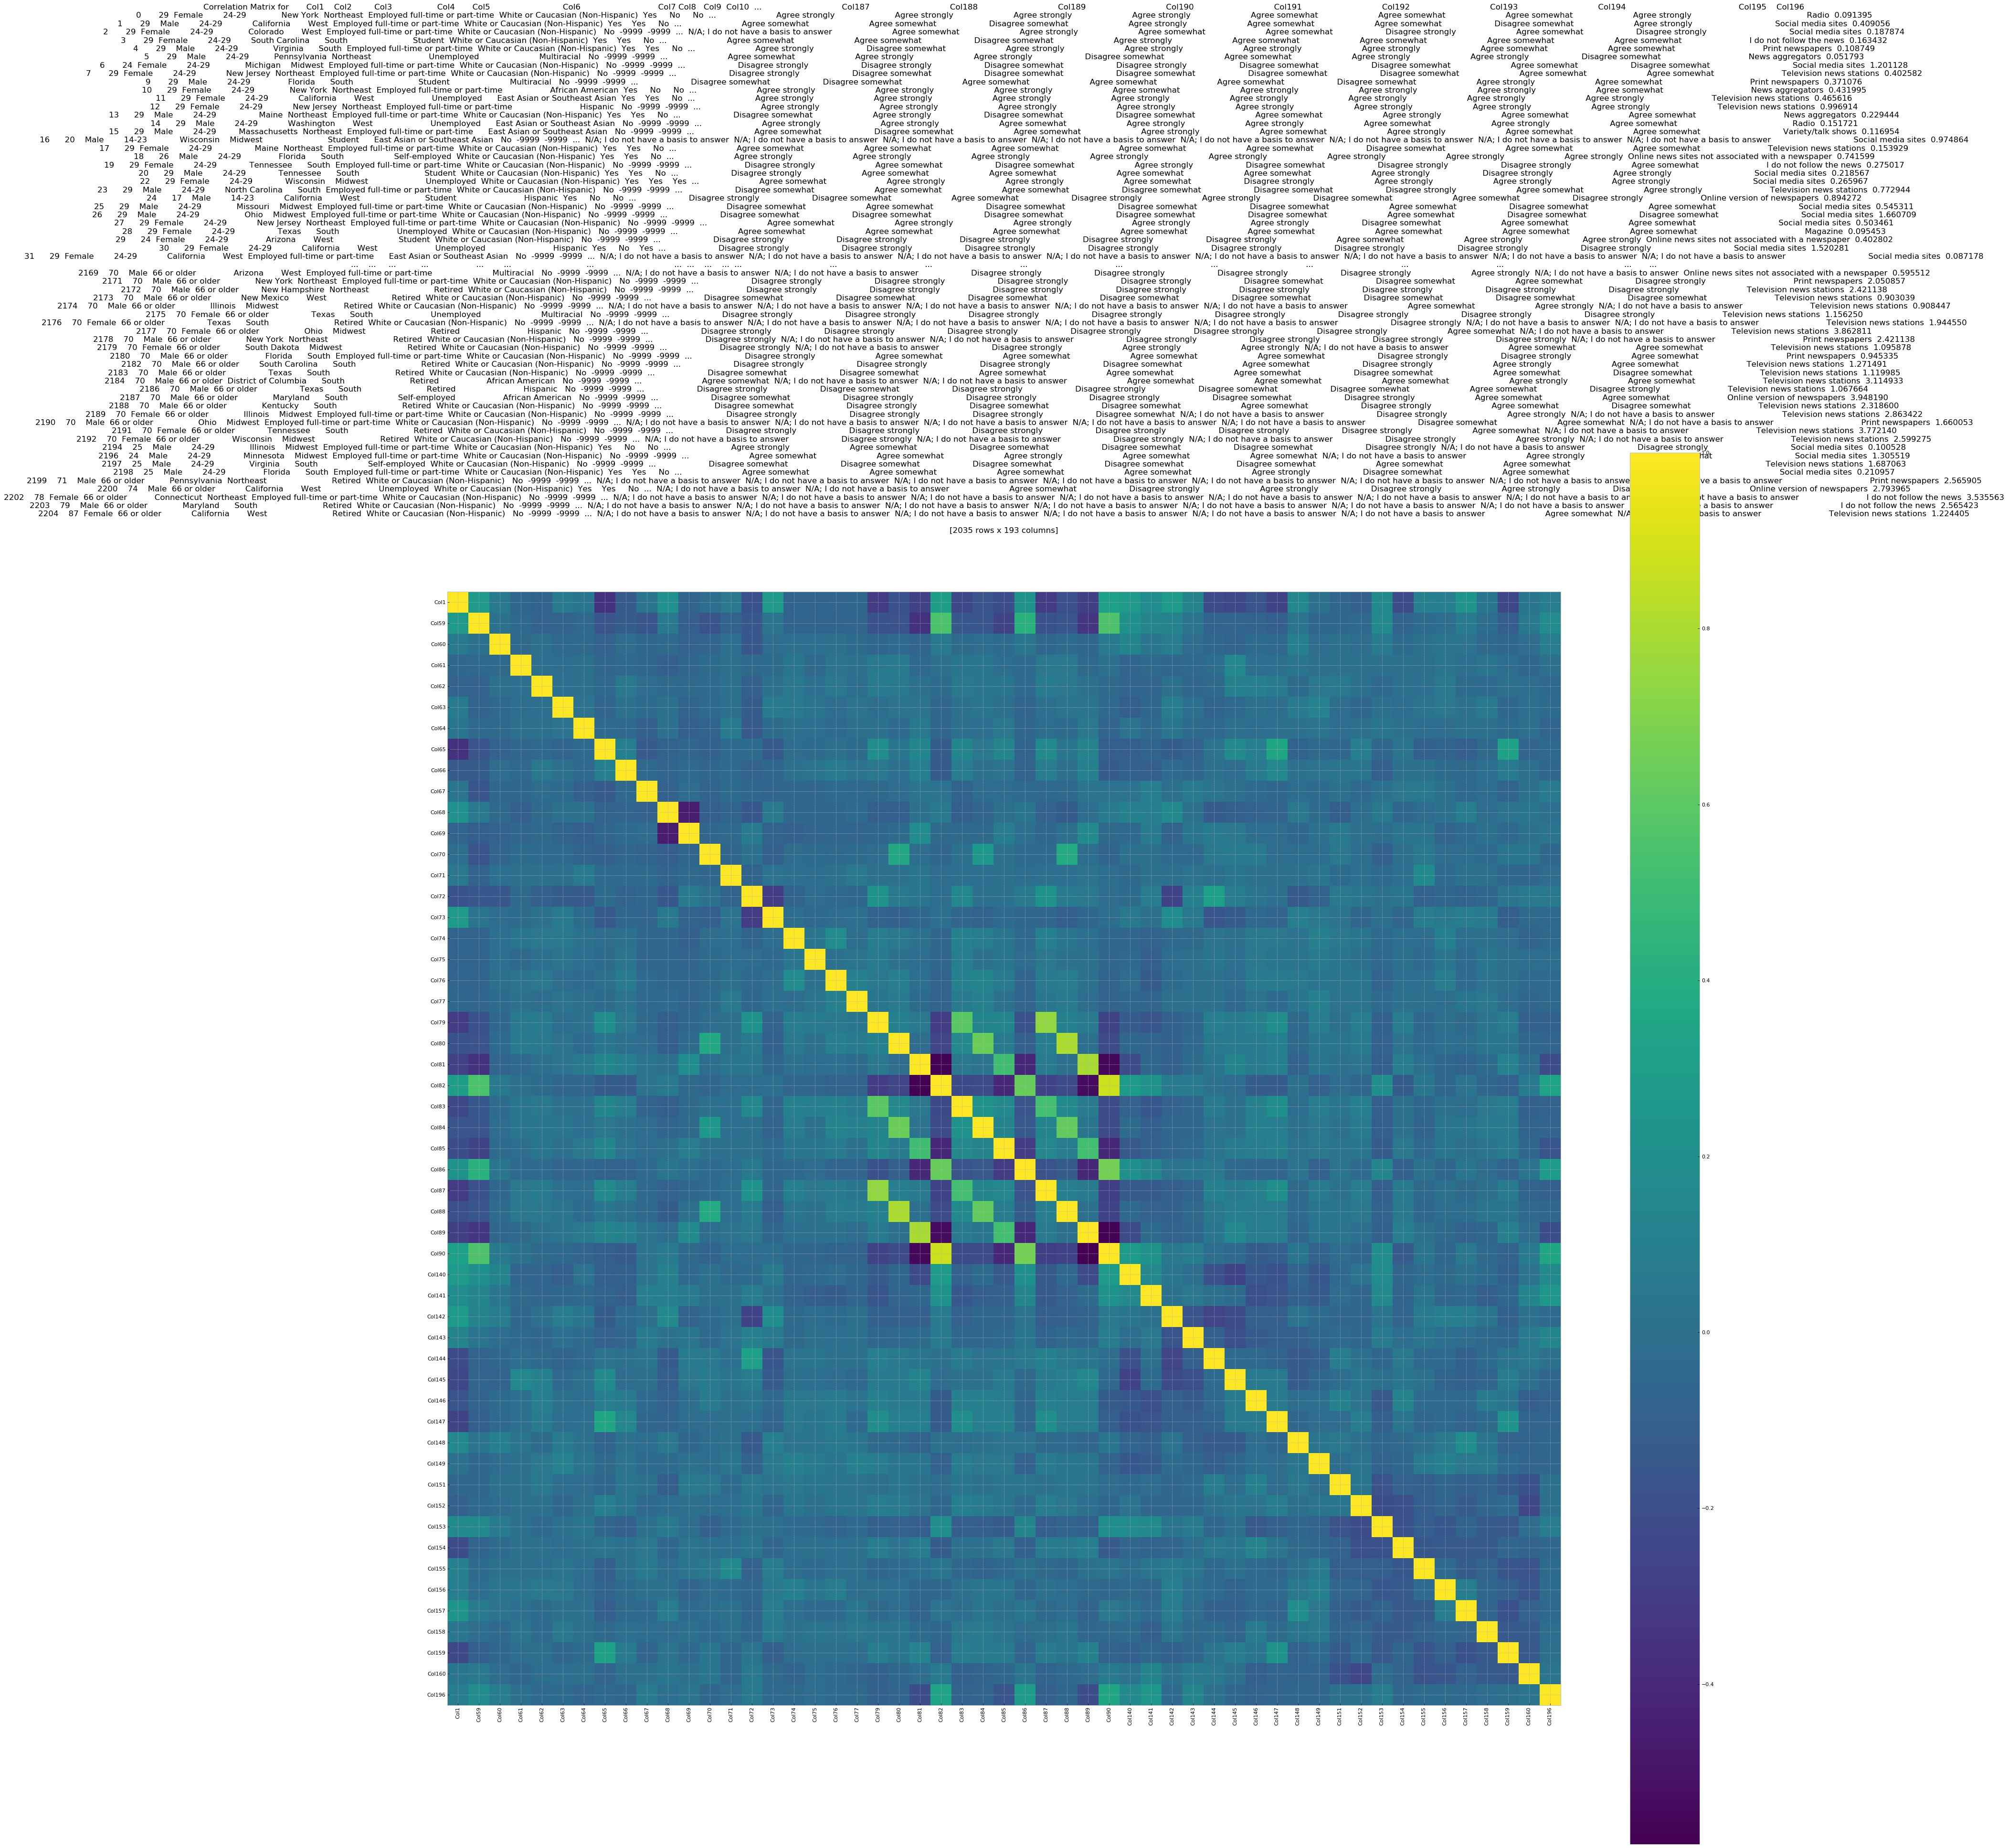

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {str(df)}', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(df_9, 47)
plotCorrelationMatrix(df_10, 47)
plotCorrelationMatrix(df_11, 47)

We could see that across the year's , there is no direct correlation amongst the features of the dataset.

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df_9, 20, 10)
    

# Data Preperation for Question - 1

In [ ]:
#reassigning column names for filtering purpose of data in 2009
df_10.columns=column_names_10
df_10

#part1 contains all columns having Q10 data
part1=df_10.filter(regex='^Q10',axis=1)
#part2 contains all columns having Q26 data
part2=df_10.filter(regex='^Q26',axis=1)
# part3 contains all columns having Q8 data
part3=df_10.filter(regex='^Q8',axis=1)

#dropping column having name Q89
part3.drop(part3.columns[len(part3.columns)-1], axis=1, inplace=True)

print('There are' ,part1.isna().any().sum(),' null values in part1 dataframe.')
print('There are' ,part2.isna().any().sum(),' null values in part2 dataframe.')
print('There are' ,part3.isna().any().sum(),' null values in part3 dataframe.')

#Replacing all NaN Values with No
part1.replace(to_replace ="-9999", value ="No",inplace=True)
part2.replace(to_replace ="-9999", value ="No",inplace=True)
part3.replace(to_replace ="-9999", value ="No",inplace=True)

#replacing all Yes with 1 and No with 0
part1.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part2.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part3.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

#part0 contains Age, Location, Ethnicity and Income Data
part00=df_10.iloc[:,:8]
part01=df_10.iloc[:,15]
task1_10=pd.concat([part00,part01,part1,part2,part3], axis=1)

#Adding a column to indicate that these records belong to 2010 dataset
task1_10['year'] = '2010'
task1_10


In [ ]:
#Renaming of columns that have slight difference in column names between datafram for 2010 and 2011


old_name_1 = "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone"
new_name_1 = "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone (not a smartphone)"


old_name_2 = "Q26 - Which of the following subscriptions does your household purchase?-Pay TV (cable and/or satellite)"
new_name_2 = "Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle)"


#Renaming the columns
task1_10.rename(columns = {old_name_1: new_name_1,
                         old_name_2: new_name_2 }, 
                                 inplace = True)
   
task1_10    



In [ ]:
#reassigning column names for filtering purpose of data in 2009
df_11.columns=column_names_11
df_11

#part1 contains all columns having Q10 data
part1=df_11.filter(regex='^Q10',axis=1)
#part2 contains all columns having Q26 data
part2=df_11.filter(regex='^Q26',axis=1)
# part3 contains all columns having Q8 data
part3=df_11.filter(regex='^Q8',axis=1)

#dropping column having name Q89
part3.drop(part3.columns[len(part3.columns)-1], axis=1, inplace=True)

print('There are' ,part1.isna().any().sum(),' null values in part1 dataframe.')
print('There are' ,part2.isna().any().sum(),' null values in part2 dataframe.')
print('There are' ,part3.isna().any().sum(),' null values in part3 dataframe.')

#Replacing all NaN Values with No
part1.replace(to_replace ="-9999", value ="No",inplace=True)
part2.replace(to_replace ="-9999", value ="No",inplace=True)
part3.replace(to_replace ="-9999", value ="No",inplace=True)

#replacing all Yes with 1 and No with 0
part1.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part2.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part3.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

#part0 contains Age, Location, Ethnicity and Income Data
part00=df_11.iloc[:,:8]
part01=df_11.iloc[:,15]
task1_11=pd.concat([part00,part01,part3,part1,part2], axis=1)

#Adding a column to indicate that these records belong to 2011 dataset
task1_11['year'] = '2011'
task1_11


# Business Case 1 : Bundling of products and subscriptions based on currently owned products and subscriptions and products to be owned in the future

In [ ]:
#concatenating the 2 dataframes 
merged_df = pd.concat([task1_10 , task1_11], axis=0).reset_index()
merged_df

#add default quantity column and assume the value of 1
merged_df['quantity'] = 1
merged_df

#Changing column names for the consumer feaatures
o1 = "Q1r1 - To begin, what is your age?"
n1 = "Age"

o2 = "Q2 - In which state do you currently reside?"
n2 ="State"

o3 = "Q4 - What is your gender?"
n3 = "Gender"

o4 = "Q5 - Which category best describes your ethnicity?"
n4 = "Ethnicity"

o5 = "Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential."
n5 = "Household Income"

o6 = "QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?"
n6 = "Children in Household?"

o7 = "QNEW3 - What is your employment status?"
n7 = "Employment status"

o8 = "age - you are..."
n8 = "Age range"

o9 = "region - Region"
n9 = "Region"


#Renaming the columns
merged_df.rename(columns = {o1 :n1 , o2:n2 ,  o3:n3 ,  o4:n4 ,  o5:n5 ,  o6:n6 ,  o7:n7 ,  o8:n8 ,  o9:n9 }, 
                                 inplace = True)


# Q8 - Products 

In [ ]:
# Creating a dataframe consisting of only consumer features and Q8 columns
df_temp = merged_df

Q8_cols = [col for col in merged_df.columns if 'Q8' in col]

#dataframe with columns for Question 8 
df_temp_1=df_temp.loc[:, df_temp.columns.isin(Q8_cols)]

temp = [col for col in merged_df.columns if 'Q8' not in col]
temp = [col for col in temp if 'Q10' not in col]
temp = [col for col in temp if 'Q26' not in col]

#dataframe with columns of consumer feature
df_temp_2=df_temp.loc[:, df_temp.columns.isin(temp)]
df_temp_2['quantity'] = 1


#combining the two dataframes
df_Q_8=pd.concat([df_temp_2 , df_temp_1 ], axis=1)
df_Q_8


# Q26 Subscriptions

In [ ]:
# Creating a dataframe consisting of only consumer features and Q26 columns

df_temp = merged_df

Q26_cols = [col for col in merged_df.columns if 'Q26' in col]
Q26_cols


#dataframe with columns for Question 26 
df_temp_3 = df_temp.loc[:, df_temp.columns.isin(Q26_cols)]

#dataframe with columns of consumer feature
df_temp_2=df_temp.loc[:, df_temp.columns.isin(temp)]
df_temp_2['quantity'] = 1


#combining the two dataframes
df_Q_26=pd.concat([df_temp_2 , df_temp_3 ], axis=1)
df_Q_26


# Q10 Future Products

In [ ]:
# Creating a dataframe consisting of only consumer features and Q10 columns

df_temp = merged_df

Q10_cols = [col for col in merged_df.columns if 'Q10' in col]
Q10_cols


#dataframe with columns for Question 10 
df_temp_4 = df_temp.loc[:, df_temp.columns.isin(Q10_cols)]

#dataframe with columns of consumer feature
df_temp_2=df_temp.loc[:, df_temp.columns.isin(temp)]
df_temp_2['quantity'] = 1


#combining the two dataframes
df_Q_10=pd.concat([df_temp_2 , df_temp_4 ], axis=1)
df_Q_10

In [ ]:
#introduce a column for products to capture all the products owned by the consumer
df_Q_8['products'] = 0
 
    
#travering through the survey enteries of each consumer to create a string of products that each consumer owns
#Ignoring the columns where products owned = Don't know or None of the above

for index , row in df_Q_8.iterrows():  
    list_products = []
    if(df_Q_8.iloc[index,12] == 1):
        list_products.append("Basic mobile phone")
    if(df_Q_8.iloc[index,13] == 1):
        list_products.append('Blu-ray disc player/DVD player')    
    if(df_Q_8.iloc[index,14] == 1):
        list_products.append('Computer network/router in your home for wireless computer/laptop usage')  
    if(df_Q_8.iloc[index,15] == 1):
        list_products.append("Dedicated e-book reader")
    if(df_Q_8.iloc[index,16] == 1):
        list_products.append("Desktop computer") 
    if(df_Q_8.iloc[index,17] == 1):
        list_products.append("Digital video recorder")  
    if(df_Q_8.iloc[index,19] == 1):
        list_products.append("Drone")  
    if(df_Q_8.iloc[index,20] == 1):
        list_products.append("Fitness band")   
    if(df_Q_8.iloc[index,21] == 1):
        list_products.append("Flat panel television")   
    if(df_Q_8.iloc[index,22] == 1):
        list_products.append("Gaming console")   
    if(df_Q_8.iloc[index,23] == 1):
        list_products.append("Laptop computer")   
    if(df_Q_8.iloc[index,25] == 1):
        list_products.append("Over-the-air digital TV antenna ")   
    if(df_Q_8.iloc[index,26] == 1):
        list_products.append("Portable streaming thumb drive/fob")   
    if(df_Q_8.iloc[index,27] == 1):
        list_products.append("Portable video game player")  
    if(df_Q_8.iloc[index,28] == 1):
        list_products.append("Smart watch")  
    if(df_Q_8.iloc[index,29] == 1):
        list_products.append("Smartphone")  
    if(df_Q_8.iloc[index,30] == 1):
        list_products.append("Streaming media box or over-the-top box")  
    if(df_Q_8.iloc[index,31] == 1):
        list_products.append("Tablet")
    if(df_Q_8.iloc[index,32] == 1):
        list_products.append("Virtual reality headset") 
   
    listToStr = ','.join([str(elem) for elem in list_products])
                    
    df_Q_8.iloc[index,33] = listToStr
    

df_Q_8



In [ ]:
#introduce a column for subscriptions to capture all the subscriptions purchased by the consumer
df_Q_26['subscriptions'] = 0

#travering through the survey enteries of each consumer to create a string of subscriptions that each consumer owns
#Ignoring the columns where subscriptions owned = Don't know or None of the above

for index , row in df_Q_26.iterrows():  
    list_subscription = []
    if(df_Q_26.iloc[index,13] == 1):
        list_subscription.append("Gaming")
    if(df_Q_26.iloc[index,14] == 1):
        list_subscription.append("Home Internet")
    if(df_Q_26.iloc[index,15] == 1):
        list_subscription.append("Landline telephone")  
    if(df_Q_26.iloc[index,16] == 1):
        list_subscription.append("Magazine(print or digital)")
    if(df_Q_26.iloc[index,17] == 1):
        list_subscription.append("Mobile data plan")
    if(df_Q_26.iloc[index,18] == 1):
        list_subscription.append("Mobile voice")    
    if(df_Q_26.iloc[index,19] == 1):
        list_subscription.append("News/Newspaper")  
    if(df_Q_26.iloc[index,21] == 1):
        list_subscription.append("Pay TV")  
    if(df_Q_26.iloc[index,22] == 1):
        list_subscription.append("Streaming music service")  
    if(df_Q_26.iloc[index,23] == 1):
        list_subscription.append("Streaming video service")  
        
    listToString = ','.join([str(elem) for elem in list_subscription])
                    
    df_Q_26.iloc[index,24] = listToString
    
df_Q_26  

In [ ]:

#introduce a column for future products to capture all the fucture products that the comsumers wish to own
df_Q_10['future products'] = 0

for index , row in df_Q_8.iterrows():  
    list_futureproducts = []
    if(df_Q_10.iloc[index,12] == 1):
        list_futureproducts.append("Basic mobile phone")
    if(df_Q_10.iloc[index,13] == 1):
        list_futureproducts.append('Blu-ray disc player/DVD player')    
    if(df_Q_10.iloc[index,14] == 1):
        list_futureproducts.append('Computer network/router in your home for wireless computer/laptop usage')  
    if(df_Q_10.iloc[index,15] == 1):
        list_futureproducts.append("Dedicated e-book reader")
    if(df_Q_10.iloc[index,16] == 1):
        list_futureproducts.append("Desktop computer") 
    if(df_Q_10.iloc[index,17] == 1):
        list_futureproducts.append("Digital video recorder")  
    if(df_Q_10.iloc[index,19] == 1):
        list_futureproducts.append("Drone")  
    if(df_Q_10.iloc[index,20] == 1):
        list_futureproducts.append("Fitness band")   
    if(df_Q_10.iloc[index,21] == 1):
        list_futureproducts.append("Flat panel television")   
    if(df_Q_10.iloc[index,22] == 1):
        list_futureproducts.append("Gaming console")   
    if(df_Q_10.iloc[index,23] == 1):
        list_futureproducts.append("Laptop computer")   
    if(df_Q_10.iloc[index,25] == 1):
        list_futureproducts.append("Over-the-air digital TV antenna ")   
    if(df_Q_10.iloc[index,26] == 1):
        list_futureproducts.append("Portable streaming thumb drive/fob")   
    if(df_Q_10.iloc[index,27] == 1):
        list_futureproducts.append("Portable video game player")  
    if(df_Q_10.iloc[index,28] == 1):
        list_futureproducts.append("Smart watch")  
    if(df_Q_10.iloc[index,29] == 1):
        list_futureproducts.append("Smartphone")  
    if(df_Q_10.iloc[index,30] == 1):
        list_futureproducts.append("Streaming media box or over-the-top box")  
    if(df_Q_10.iloc[index,31] == 1):
        list_futureproducts.append("Tablet")
    if(df_Q_10.iloc[index,32] == 1):
        list_futureproducts.append("Virtual reality headset") 
#     print(list_products)    
    listToStrg = ','.join([str(elem) for elem in list_futureproducts])
                    
    df_Q_10.iloc[index,33] = listToStrg
    

df_Q_10 


In [ ]:
#Making a new dataframe with only features and products

df1 = df_Q_8.iloc[:,0:12]
df2 = df_Q_8.iloc[:,-1].to_frame()


df_new_8=pd.concat([df1 , df2 ], axis=1)
df_new_8



In [ ]:
#Making a new dataframe with only features and subscrption

df1 = df_Q_26.iloc[:,0:12]
df2 = df_Q_26.iloc[:,-1].to_frame()


df_new_26=pd.concat([df1 , df2 ], axis=1)
df_new_26

In [ ]:
#Making a new dataframe with only features and future products

df1 = df_Q_10.iloc[:,0:12]
df2 = df_Q_10.iloc[:,-1].to_frame()


df_new_10=pd.concat([df1 , df2 ], axis=1)
df_new_10

In [ ]:
# merging the 3 dataframes of products , subscriptions and future subscriptions 
df_merged1 =  pd.merge(df_new_8, df_new_26, on=['index','Age', 'State' , 'Gender' ,'Ethnicity' , 'Household Income' , 'Children in Household?',
                                'Employment status' , 'Age range' , 'Region' , 'year' , 'quantity'])
df_merged2 = pd.merge(df_merged1, df_new_10, on=['index','Age', 'State' , 'Gender' ,'Ethnicity' , 'Household Income' , 'Children in Household?',
                                'Employment status' , 'Age range' , 'Region' , 'year' , 'quantity'])

#eliminating rows that consists of null values in either of these 3 columns 
df_merged2.replace("", float("NaN") , inplace = True)
df_merged2.dropna(subset = ["future products"] , inplace = True)
df_merged2.dropna(subset = ["products"] , inplace = True)
df_merged2.dropna(subset = ["subscriptions"] , inplace = True)
df_merged2

# Determining Top 5 Products Currently Owned

In [ ]:
#top 5 products owned
num_columns = df_Q_8.shape[1]

list_sum = []
list_col_name = []

for i in range(12 , num_columns-2):
    list_sum.append(df_Q_8.iloc[:,i].sum())
    list_col_name.append(df_Q_8.columns[i])
    

a=pd.DataFrame(data=list_sum,index = list_col_name,columns=['frequency'])
a.sort_values(by='frequency',ascending=False,inplace=True)
temp_5 = a.head(5)
temp_5

#plotting top 5 products
col = ['Laptop computer' , 'Smartphone' , 'Flat panel television' , 'Desktop computer' , 'Tablet']
temp_5['products'] = col
temp_5 = temp_5.set_index('products')
temp_5.plot.bar()


# Determining Top 5 Subscriptions Currently Purchased

In [ ]:
#top 5 subcriptions
num_columns = df_Q_26.shape[1]

list_sum = []
list_col_name = []

for i in range(12 , num_columns-2):
    list_sum.append(df_Q_26.iloc[:,i].sum())
    list_col_name.append(df_Q_26.columns[i])
    

b=pd.DataFrame(data=list_sum,index = list_col_name,columns=['frequency'])
b.sort_values(by='frequency',ascending=False,inplace=True)
temp_6 = b.head(5)

col = ['Home Internet' , 'Pay TV' , 'Mobile voice' , 'Mobile data plan' , 'Landline telephone']
temp_6['subscriptions'] = col
temp_6 = temp_6.set_index('subscriptions')
temp_6.plot.bar()




# Laptop Computer + Home Internet

In [ ]:
# taking combination of product ( Laptop computer ) and subsciprtion ( Home Internet ) 
# to determine the highest frequency of future product desired
df_laptop = df_merged2.loc[df_merged2['products'].str.contains("Laptop computer")]

df_laptop =df_laptop.loc[df_laptop['subscriptions'].str.contains("Home Internet")]


#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_laptop)):
    my_string = " "
    my_list = []
    my_string = df_laptop.iloc[i , -1]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are future procudts           
from operator import itemgetter
type(sorted(Product_wordDict.items(), key=itemgetter(1)))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")
plt.xlabel('Future Products')
plt.ylabel('Frequency')


We see that , people who currently own Laptop computers and have a Home Internet Subscription , are most likely to but a Fitness Band or Smart Watch in the future

# Laptop Computer + Pay Tv

In [ ]:
# taking combination of product ( Laptop computer ) and subsciprtion ( Pay TV ) 
# to determine the highest frequency of future product desired
df_laptop = df_merged2.loc[df_merged2['products'].str.contains("Laptop computer")]

df_laptop =df_laptop.loc[df_laptop['subscriptions'].str.contains("Pay TV")]
df_laptop


#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_laptop)):
    my_string = " "
    my_list = []
    my_string = df_laptop.iloc[i , -1]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
                 
#Sorting the dictionary in increasing order of values, where keys are future procudts    
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")
plt.xlabel('Future Products')
plt.ylabel('Frequency')

We see that , people who currently own Laptop computers and have a Pay TV Subscription , are most likely to but a Fitness Band or Smart Watch in the future

# Laptop Computer  + Mobile Voice

In [ ]:
# taking combination of product ( Laptop computer ) and subsciprtion ( Mobile Voice) 
# to determine the highest frequency of future product desired

df_laptop = df_merged2.loc[df_merged2['products'].str.contains("Laptop computer")]

df_laptop =df_laptop.loc[df_laptop['subscriptions'].str.contains("Mobile voice")]
df_laptop

#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_laptop)):
    my_string = " "
    my_list = []
    my_string = df_laptop.iloc[i , -1]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are future products           
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")

plt.xlabel('Future Products')
plt.ylabel('Frequency')

We see that , people who currently own Laptop computers and have a Mobile Voice Subscription , are most likely to but a Fitness Band or Smart Watch in the future

# Smart Phone + Home internet

In [ ]:
# taking combination of product ( Smartphone ) and subsciprtion ( Home Internet ) 
# to determine the highest frequency of future product desired

df_smartphone = df_merged2.loc[df_merged2['products'].str.contains("Smartphone")]

df_smartphone =df_smartphone.loc[df_smartphone['subscriptions'].str.contains("Home Internet")]
df_smartphone


#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_smartphone)):
    my_string = " "
    my_list = []
    my_string = df_smartphone.iloc[i , -1]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are future products       
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")

plt.xlabel('Future Products')
plt.ylabel('Frequency')



We see that , people who currently own Smartphone and have a Home Internet Subscription , are most likely to but a Fitness Band or Smart Watch in the future

# Flat Panel Television + Home Internet

In [ ]:
# taking combination of product ( Smartphone ) and subsciprtion ( Home Internet ) 
# to determine the highest frequency of future product desired

df_TV = df_merged2.loc[df_merged2['products'].str.contains("Flat panel television")]

df_TV =df_TV.loc[df_TV['subscriptions'].str.contains("Home Internet")]


#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_TV)):
    my_string = " "
    my_list = []
    my_string = df_TV.iloc[i , -1]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are future products       
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

We see that , people who currently own Flat Panel Television and have a Home Internet Subscription , are most likely to but a Fitness Band or Smart Watch in the future

# Product + Subscription owned by Females

In [ ]:
# filter the dataframe to only records that belong to Females
df_female = df_merged2.loc[df_merged2['Gender'] == "Female"]
df_female

#Creating a word dictionary to determine frequency of future products 
Product_wordDict ={}
for i in range (0,len(df_female)):
    my_string = " "
    my_list = []
    my_string = df_female.iloc[i , -3]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are  products       
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))


plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")

plt.xlabel('Products')
plt.ylabel('Frequency')


In [ ]:
#Creating a word dictionary to determine frequency of subscriptions
Product_wordDict ={}
for i in range (0,len(df_female)):
    my_string = " "
    my_list = []
    my_string = df_female.iloc[i , -2]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are subscriptions       
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")

plt.xlabel('Subscriptions')
plt.ylabel('Frequency')


Top 3 products : Laptop Computer / Smartphone / Flat panel television  

Top Subscription : Home Internet / Pay TV / Mobile data plan 

# Product + Subscription owned by Males

In [ ]:
# filter the dataframe to only records that belong to Males
df_male = df_merged2.loc[df_merged2['Gender'] == "Male"]


Product_wordDict ={}
for i in range (0,len(df_male)):
    my_string = " "
    my_list = []
    my_string = df_male.iloc[i , -3]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are products       
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))

plt.subplots(figsize = (20,10))
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")
plt.xlabel('Products')
plt.ylabel('Frequency')




In [ ]:
#Creating a word dictionary to determine frequency of Subscriptions
Product_wordDict ={}
for i in range (0,len(df_male)):
    my_string = " "
    my_list = []
    my_string = df_male.iloc[i , -2]
    my_list = my_string.split(",")
#     print(my_list)
    for i in range (0 , len(my_list)):
        key = my_list[i]
        if key not in  Product_wordDict:
            Product_wordDict[key] =0
        Product_wordDict[key] = Product_wordDict[key]+1
        
        
#Sorting the dictionary in increasing order of values, where keys are Subscriptions      
from operator import itemgetter
sorted(Product_wordDict.items(), key=itemgetter(1))


plt.subplots(figsize = (20,10))
# ax = sns.barplot(x=range(len(Product_wordDict)), y=, data=tips)
plt.bar(range(len(Product_wordDict)), list(Product_wordDict.values()), align='center')
plt.xticks(range(len(Product_wordDict)), list(Product_wordDict.keys()) , rotation = 45 , 
          horizontalalignment="right")
plt.xlabel('Subscriptions')
plt.ylabel('Frequency')

Top Products : Laptop Computer / Smartphone / Deskstop computer 

Top Subscription : Home Internet / Pay TV / Streaming Video Service  

# Business Case 2 : Inclination Towards Ad-based video streaming


In [ ]:
#reassigning column names for filtering purpose of data in 2009
df_10.columns=column_names_10
df_10

#part1 contains all columns having Q26-Video data
part1=df_10.filter(regex='^Q26',axis=1)
part1=part1.iloc[:,5].to_frame()

#part2 contains all columns having QNEW28 data
part2=df_10.filter(regex='^QNEW28',axis=1)
#part3 contains all columns having Q39 data
part3=df_10.filter(regex='^Q39',axis=1)


print('There are' ,part1.isna().any().sum(),' null values in part1 dataframe.')
print('There are' ,part2.isna().any().sum(),' null values in part2 dataframe.')
print('There are' ,part3.isna().any().sum(),' null values in part3 dataframe.')

#Replacing all NaN Values with No
part1.replace(to_replace ="-9999", value ="No",inplace=True)
part2.replace(to_replace ="-9999", value ="Never",inplace=True)
part3.replace(to_replace ="-9999", value ="N/A; I do not have a basis to answer",inplace=True)

# #replacing all Yes with 1 and No with 0
part1.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part2.replace(to_replace=['Never','Rarely (one to three times a year)','Occasionally (monthly)','Frequently (every day/weekly)'],value=[1,2,2,3],inplace=True)
part3.replace(to_replace=['N/A; I do not have a basis to answer','Disagree strongly','Disagree somewhat','Agree somewhat','Agree strongly'],value=[0,0,0,1,1],inplace=True)

#part0 contains Age, Location, Ethnicity and Income Data
part00=df_10.iloc[:,:8]
part01=df_10.iloc[:,15]

task2_10=pd.concat([part00,part01,part1,part2,part3], axis=1)
task2_10["year"] = [2010 for i in range(len(task2_10))]

task2_10.head(5)

In [ ]:
#reassigning column names for filtering purpose of data in 2009
df_11.columns=column_names_11

#part1 contains all columns having Q26-Video data
part1=df_11.filter(regex='^Q26',axis=1)
part1=part1.iloc[:,5].to_frame()

#part2 contains all columns having QNEW28 data
part2=df_11.filter(regex='^QNEW28',axis=1)
# part3 contains all columns having Q8 data
part3=df_11.filter(regex='^Q39',axis=1)


print('There are' ,part1.isna().any().sum(),' null values in part1 dataframe.')
print('There are' ,part2.isna().any().sum(),' null values in part2 dataframe.')
print('There are' ,part3.isna().any().sum(),' null values in part3 dataframe.')

#Replacing all NaN Values with No
part1.replace(to_replace ="-9999", value ="No",inplace=True)
part2.replace(to_replace ="-9999", value ="Never",inplace=True)
part3.replace(to_replace ="-9999", value ="N/A; I do not have a basis to answer",inplace=True)

#replacing all Yes with 1 and No with 0
part1.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
part2.replace(to_replace=['Never','Rarely (one to three times a year)','Occasionally (monthly)','Frequently (every day/weekly)'],value=[1,2,2,3],inplace=True)
part3.replace(to_replace=['N/A; I do not have a basis to answer','Disagree strongly','Disagree somewhat','Agree somewhat','Agree strongly'],value=[0,0,0,1,1],inplace=True)

#part0 contains Age, Location, Ethnicity and Income Data
part00=df_11.iloc[:,:8]
part01=df_11.iloc[:,15]

task2_11=pd.concat([part00,part01,part1,part2,part3], axis=1)
task2_11["year"] = [2011 for i in range(len(task2_11))]

task2_11.head(5)

# Classification of Consumer Behavious: Ad-based Video Subscription

In [ ]:
#Preparing the combined dataframe for 2010 & 2011 dataset
task2_11 = task2_11.rename(columns={"Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit": "Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest"})
task2_11 = task2_11.rename(columns={"QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?" : "QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information to watch digital content?"})
df_task2 = task2_10.append(task2_11, ignore_index = True)

#Selecting the necessary columns for the 
df_task2_1 = df_task2.iloc[:, [1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,-2]]

#Definig feature & target dataframes
X = df_task2_1.iloc[:, :-1]
Y = df_task2_1.iloc[:,-1]

In [ ]:
#Plotting the Distribtuion of target variable
plt.subplots(figsize=(12,12))
sns.countplot(x='Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest'
              ,data=df_task2_1)
plt.title("Distribution of Target Variable")
plt.grid()
plt.show()

In [ ]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes == object

# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

X.head(10)

In [ ]:
#Refernce : https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1, shuffle = True)

# Create the classifier:
classifier = RandomForestClassifier(n_estimators = 100,  random_state = 42)

# Fit the classifier to the training data
classifier.fit(np.array(X_train), np.array(Y_train))

# Predict on the test data: y_pred
Y_pred = classifier.predict(np.array(X_test))
Y_pred_prob = classifier.predict_proba(np.array(X_test))
pred_proba = [np.round((Y_pred_prob[i][1]),4) for i in range(len(Y_pred_prob))]

print("The Accuracy of model is ")
print(np.round(accuracy_score(Y_test,Y_pred),4))

#Calculating metrics to plot an ROC curve
fpr_rfc, tpr_rfc, threshold1  = roc_curve(Y_test, pred_proba)

pd.crosstab(Y_test, Y_pred)

In [ ]:
# Create the classifier:
svc = SVC(probability = True)  
# Fit the classifier to the training data
svc.fit(X_train, Y_train)
    
# Predict probability on the test data: y_pred
prob_pred = svc.predict_proba(X_test)

# Predict on the test data: y_pred
Y_pred = svc.predict(np.array(X_test))
Y_pred_prob = svc.predict_proba(np.array(X_test))
pred_proba = [np.round((Y_pred_prob[i][1]),4) for i in range(len(Y_pred_prob))]

print("The Accuracy of Support Vector Machine Model is ")
print(np.round(accuracy_score(Y_test,Y_pred),4))

#Calculating metrics to plot an ROC curve
fpr_svc, tpr_svc, threshold2  = roc_curve(Y_test, pred_proba)

pd.crosstab(Y_test, Y_pred)

In [ ]:
#Plotting an RO graph to using false postive and true postive rates to determine the model performence
#Refernece: https://www.dezyre.com/recipes/plot-roc-curve-in-python

plt.figure(figsize=(10,8))
plt.plot(fpr_rfc, tpr_rfc, label ='RandomForestClassifier', linestyle='-')
plt.plot(fpr_svc, tpr_svc, label ='SupportVectorMachine', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Business Case 3: Hyper Ad-targeting using customer segmentation


In [ ]:
#Selecting the dataframe for the task
df_task2_2 = df_task2.iloc[ : ,[1,2,3,5,8,11,12,13,14,15,16]]
df_task2_2 = df_task2_2.set_index(['Q4 - What is your gender?', 'age - you are...','Q2 - In which state do you currently reside?',
 'QNEW3 - What is your employment status?',
 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'])

df_task2_2.head()

In [ ]:
#Determining Value K for Kmeans Clustering using elbow method 
#Referece: https://pythonprogramminglanguage.com/kmeans-elbow-method/

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 0).fit(df_task2_2)
    kmeanModel.fit(df_task2_2)
    distortions.append(sum(np.min(cdist(df_task2_2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_task2_2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method to select the optimal K')
plt.show()

In [ ]:
#Development of KMode clustering model
clustModel = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clust_labels = clustModel.fit_predict(df_task2_2)

#Plotting the cluster centers
cluster_centers = clustModel.cluster_centroids_

In [ ]:
#Development of KMeans clustering model

clustModel = KMeans(n_clusters = 3, random_state = 10)
clustModel.fit(df_task2_2)
clust_labels = clustModel.predict(df_task2_2)

#Assinging cluster label for each shop 
df_task2_2['clust_labels'] = clust_labels

#Plotting the cluster centers
cluster_centers=clustModel.cluster_centers_

x = cluster_centers[:, 0]
y = cluster_centers[:, 1]
plt.scatter(x, y, s=75)
plt.title("Scatter Plot indicating Clusters")
plt.grid()
plt.show()

In [ ]:
#Plotting group behaviour of users in a specific cluster
clust1 = df_task2_2[df_task2_2['clust_labels'] == 2].reset_index()
clust1_col = clust1.columns.to_list()
df_clust1_grp = clust1.groupby(clust1_col[5:11])['clust_labels'].sum()
df_clust1_grp = pd.DataFrame(df_clust1_grp)
df_clust1_grp = df_clust1_grp.reset_index()
df_clust1_grp.sort_values('clust_labels', ascending=False).head(10)

In [ ]:
#Plttong the Distribution of Employment Status in Cluster 1
plt.subplots(figsize=(10,8))

sns.countplot(x='QNEW3 - What is your employment status?', data=clust1[['QNEW3 - What is your employment status?']])
plt.xlabel('Employment Status')
plt.ylabel("Frequency")
plt.title("Distribution of Employment Status in Cluster 1")
plt.grid()
plt.show()

In [ ]:
#Plotting the Location of Users in Cluster 1

plt.subplots(figsize=(12,10))

sns.countplot(y='Q2 - In which state do you currently reside?', data=clust1[['Q2 - In which state do you currently reside?']])
plt.xlabel('Frequency')
plt.ylabel("State")
plt.title("Location of Users in Cluster 1")
plt.show()

In [ ]:
#Plotting the salary of Users in Cluster 1

plt.subplots(figsize=(12,10))

sns.countplot(y='Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.', data=clust1[['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.']])
plt.xlabel('Frequency')
plt.ylabel("Salary Distribution")
plt.title("Salaary of Users in Cluster 1")
plt.show()